C:\Users\MOISES\AppData\Local\Temp\ipykernel_6572\267275544.py:9: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


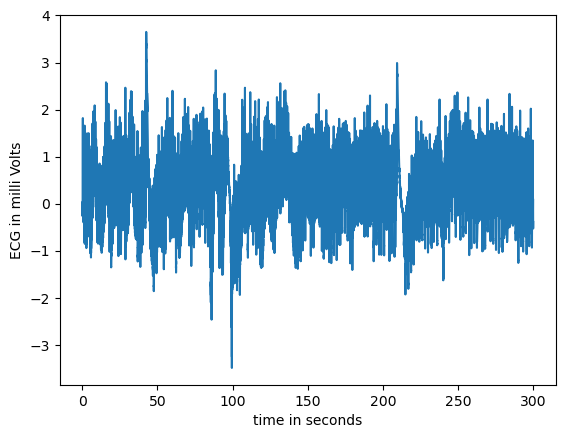

In [1]:
# import electrocardiogram 
import matplotlib.pyplot as plt 
from scipy.misc import electrocardiogram 
  
# import numpy 
import numpy as np 
  
# define electrocardiogram as ecg model 
ecg = electrocardiogram() 
  
# frequency is 0 
frequency = 360
  
# calculating time data with ecg size along with frequency 
time_data = np.arange(ecg.size) / frequency 
  
# plotting time and ecg model 
plt.plot(time_data, ecg) 
plt.xlabel("time in seconds") 
plt.ylabel("ECG in milli Volts") 
  
# display 
plt.show() 

In [2]:
import neurokit2 as nk

In [22]:
signal = ecg[:5000]
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=500)
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=500, method="peak")

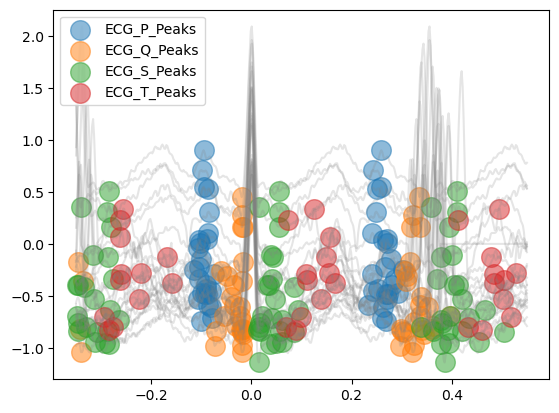

In [23]:
signal_dwt, waves_dwt = nk.ecg_delineate(signal, 
                                        rpeaks, 
                                        sampling_rate=500, 
                                        method="dwt", 
                                        show=True, 
                                        show_type='peaks')

In [28]:
def  Hampel_Filter():
    signal= signal-np.mean(signal) #To center the signal in 0
    outlier_indices = hampel(pd.Series(signal), window_size=100, n=3)

    peaks = [list(map(itemgetter(1), g)) for k, g in groupby(enumerate(outlier_indices), lambda x: x[0]-x[1])]
    peaks_max_vals = [peaks[i][np.argmax(abs(signal[peaks[i]]))] for i in range(len(peaks))]
    peaks_sign = np.sign(signal[peaks_max_vals])
    diffs_max = np.where((np.diff(peaks_max_vals)<40))[0]
    zipped_list = list(zip(signal[peaks_max_vals],peaks_sign,peaks_max_vals))

    counter = 0

    for i in diffs_max:
        a = i + 1
        if zipped_list[i][0] > zipped_list[a][0] and zipped_list[i][1]==zipped_list[a][1]:
            peaks_max_vals.pop(a-counter)
            counter += 1
        if zipped_list[i][0] < zipped_list[a][0] and zipped_list[i][1]==zipped_list[a][1]:
            peaks_max_vals.pop(i-counter)
            counter +=1
        else:
            pass
        signal= signal-np.mean(signal) #To center the signal in 0
    outlier_indices = hampel(pd.Series(signal), window_size=100, n=3)

    peaks = [list(map(itemgetter(1), g)) for k, g in groupby(enumerate(outlier_indices), lambda x: x[0]-x[1])]
    peaks_max_vals = [peaks[i][np.argmax(abs(signal[peaks[i]]))] for i in range(len(peaks))]
    peaks_sign = np.sign(signal[peaks_max_vals])
    diffs_max = np.where((np.diff(peaks_max_vals)<40))[0]
    zipped_list = list(zip(signal[peaks_max_vals],peaks_sign,peaks_max_vals))

    counter = 0

    for i in diffs_max:
        a = i + 1
        if zipped_list[i][0] > zipped_list[a][0] and zipped_list[i][1]==zipped_list[a][1]:
            peaks_max_vals.pop(a-counter)
            counter += 1
        if zipped_list[i][0] < zipped_list[a][0] and zipped_list[i][1]==zipped_list[a][1]:
            peaks_max_vals.pop(i-counter)
            counter +=1
        else:
            pass

# Finally, examining the power spectrum reveals that most of the biosignal is made up of lower frequencies. At 60 Hz the noise induced by the mains electricity can be clearly observed.

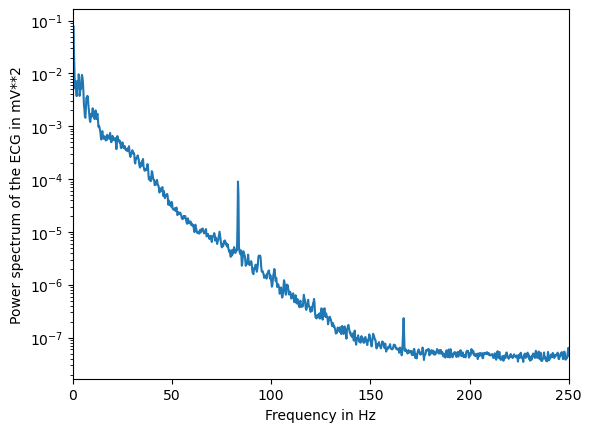

In [25]:
from scipy.signal import welch
f, Pxx = welch(ecg, fs=500, nperseg=2048, scaling="spectrum")
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the ECG in mV**2")
plt.xlim(f[[0, -1]])
plt.show()